##### Copyright 2019 The TensorFlow Authors.

In [2]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# TensorFlow 2 quickstart for beginners

This short introduction uses [Keras](https://www.tensorflow.org/guide/keras/overview) to:

1. Load a prebuilt dataset.
1. Build a neural network machine learning model that classifies images.
2. Train this neural network.
3. Evaluate the accuracy of the model.

## Set up TensorFlow

Import TensorFlow and load the dataset to get started.

![MNIST](img\MnistExamples.png)



In [3]:
import tensorflow.keras as ks
import tensorflow as tf
mnist = ks.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 #Scale data to [0,1] range

In [7]:
#attention: usig matplot and tensorflow in the same noetbooks may cause crashes

# from matplotlib import pyplot as plt
# plt.imshow(x_train[0], interpolation='nearest')
# plt.show()

print("Label: ", y_train[0])
x_train[0][10:20,10:20]

Label:  5


array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294,
        0.62745098, 0.42352941, 0.00392157, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647,
        0.99215686, 0.99215686, 0.46666667, 0.09803922, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.17647059,
        0.72941176, 0.99215686, 0.99215686, 0.58823529, 0.10588235],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.0627451 , 0.36470588, 0.98823529, 0.99215686, 0.73333333],
       [0.        , 0.        , 0.       

## Build a machine learning model

Build a `tf.keras.Sequential` model by stacking layers.

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


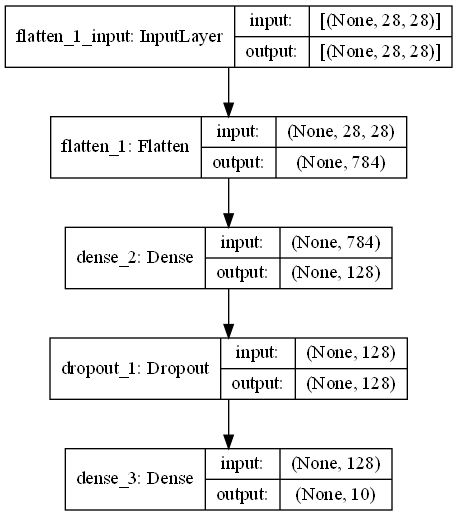

In [17]:

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

model.summary()

tf.keras.utils.plot_model(
model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

For each example, the model returns a vector of [logits](https://developers.google.com/machine-learning/glossary#logits) or [log-odds](https://developers.google.com/machine-learning/glossary#log-odds) scores, one for each class.

In [18]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.5091701 ,  0.02533021, -0.20127404, -0.07767881,  0.42168468,
         0.42857447,  0.01210496, -0.12632482, -0.567314  ,  0.36998332]],
      dtype=float32)

The `tf.nn.softmax` function converts these logits to *probabilities* for each class: 

In [19]:
tf.nn.softmax(predictions).numpy()

array([[0.14595221, 0.08996668, 0.07172469, 0.08116063, 0.13372612,
        0.13465065, 0.08878467, 0.07730699, 0.04973929, 0.12698798]],
      dtype=float32)

Note: It is possible to bake the `tf.nn.softmax` function into the activation function for the last layer of the network. While this can make the model output more directly interpretable, this approach is discouraged as it's impossible to provide an exact and numerically stable loss calculation for all models when using a softmax output. 

Define a loss function for training using `losses.SparseCategoricalCrossentropy`, which takes a vector of logits and a `True` index and returns a scalar loss for each example.

In [20]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

This loss is equal to the negative log probability of the true class: The loss is zero if the model is sure of the correct class.

This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to `-tf.math.log(1/10) ~= 2.3`.

In [21]:
loss_fn(y_train[:1], predictions).numpy()

2.0050716

Before you start training, configure and compile the model using Keras `Model.compile`. Set the [`optimizer`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) class to `adam`, set the `loss` to the `loss_fn` function you defined earlier, and specify a metric to be evaluated for the model by setting the `metrics` parameter to `accuracy`.

In [22]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])


## Train and evaluate your model
Epoch: A training epoch represents a complete use of all training data for gradients calculation and optimizations(train the model).

Step: A training step means using one batch size of training data to train the model.

Use the `Model.fit` method to adjust your model parameters and minimize the loss: 

In [23]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2963 - accuracy: 0.9147
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1422 - accuracy: 0.9572
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1075 - accuracy: 0.9678
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0879 - accuracy: 0.9732: 0s -
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0754 - accuracy: 0.9761


The `Model.evaluate` method checks the models performance, usually on a "[Validation-set](https://developers.google.com/machine-learning/glossary#validation-set)" or "[Test-set](https://developers.google.com/machine-learning/glossary#test-set)".

In [24]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0718 - accuracy: 0.9779


[0.07181525975465775, 0.9779000282287598]

The image classifier is now trained to ~98% accuracy on this dataset. To learn more, read the [TensorFlow tutorials](https://www.tensorflow.org/tutorials/).

If you want your model to return a probability, you can wrap the trained model, and attach the softmax to it:

In [25]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [26]:
import numpy as np
Prediction= probability_model(x_test[:1])


print("True Label: {} \nPredicted Label: {} with probability: {:0.2f} %".format(np.argmax(Prediction),y_test[0] ,Prediction[0,np.argmax(Prediction)]*100))

True Label: 7 
Predicted Label: 7 with probability: 99.99 %


## Conclusion

Congratulations! You have trained a machine learning model using a prebuilt dataset using the [Keras](https://www.tensorflow.org/guide/keras/overview) API.

For more examples of using Keras, check out the [tutorials](https://www.tensorflow.org/tutorials/keras/). To learn more about building models with Keras, read the [guides](https://www.tensorflow.org/guide/keras). If you want learn more about loading and preparing data, see the tutorials on [image data loading](https://www.tensorflow.org/tutorials/load_data/images) or [CSV data loading](https://www.tensorflow.org/tutorials/load_data/csv).


*adapted from : https://www.tensorflow.org/tutorials/quickstart/beginner*